<a href="https://colab.research.google.com/github/chrishg23-jpg/HES-benchmark/blob/main/HES_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

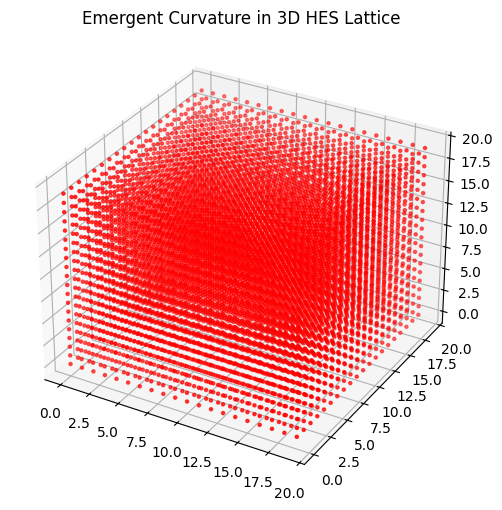

In [ ]:
# HES 3D Lattice Simulation Prototype
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
L = 20  # lattice size
steps = 100  # number of time steps
alpha = 0.2  # stronger local interaction
beta = 0.01  # damping
gamma = 0.001  # global stabilizer

# Initialize 3D lattice with small fluctuations
s = np.random.uniform(-0.5, 0.5, (L, L, L))

# Define 3D Laplacian
def laplacian_3d(s):
    lap = (
        np.roll(s, 1, axis=0) + np.roll(s, -1, axis=0) +
        np.roll(s, 1, axis=1) + np.roll(s, -1, axis=1) +
        np.roll(s, 1, axis=2) + np.roll(s, -1, axis=2) - 6 * s
    )
    return lap

# Run simulation
for t in range(steps):
    lap = laplacian_3d(s)
    global_entropy = np.mean(s)
    s += alpha * lap - beta * s - gamma * global_entropy

# Visualize curvature emergence
threshold = 0.01  # more sensitive to subtle gradients
curved = np.abs(laplacian_3d(s)) > threshold
x, y, z = np.where(curved)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='red', s=5)
ax.set_title("Emergent Curvature in 3D HES Lattice")
plt.show()
